In [72]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
import os
plt.style.use('ggplot')

In [47]:
full_dataset_list = ['sst5', 'trec','agnews', 'financial_phrasebank', 'glue_sst2', \
                     'rotten_tomatoes', 'subjective', 'tweet_eval_emotion', 'tweet_eval_hate']

In [100]:
# Load in result dictionarys

# Specify a model name 
model = 'Llama' # 'Qwen', 'Mistral'
results_dicts = dict()

results_dir = '../results' # /path/to/results/folder

# results_dicts[k] has all the experiment results for k-shots 
for k in [4,8,16]:
    results_dict = dict()
    for dataset_name in full_dataset_list:
        try:
            file_path = os.path.join(results_dir,f"results_k_[{k}]_seeds_5_datasets_['{dataset_name}']_models_['{model}']_.pkl")
            with open(file_path,'rb') as f:
                results_dict[dataset_name] = pickle.load(f)
        except Exception as e:
            print(e)
            print(f'Cannot find {dataset_name} for k={k}')
    results_dicts[k] = results_dict

# results_dicts structure: results_dicts[4][dataset_name][model_name][results_name][dataset_name_][seed_name]['k'][method_name][metric_name]
# Example: results_dicts[4]['glue_sst2']['Llama']['results_dic']['GLUE-SST2']['seed_2206632489']['4']['Baseline']['accuracy']

In [101]:
# Convenient list of datasets for varying k 
k_dataset_lists = {
    4: full_dataset_list[2:],
    8: full_dataset_list,
    16: full_dataset_list
}
# Complete list of methods: ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting', \
#                            'LR-1-average_voting', 'LR-2-average_voting', 'LR-3-average_voting', ...] 
methods_to_compare = ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting']
# Complete list of metrics: ['accuracy', 'averaged_truelabel_likelihood', 'macro_F1', 'expected_calibration_error_1']
metrics_to_compare = ['accuracy','macro_F1']

In [102]:
def compute_metrics(results_dict, dataset_list, methods, metrics):
    summary = dict()
    for metric in metrics:
        summary[metric] = []
        
        metric_arr = []
        for dataset_name in dataset_list:
            methods_perms = dict()
            for method in methods:
                methods_perms[method] = []
            
            outcomes = results_dict[dataset_name][model]['results_dic']
            outcomes = outcomes[list(outcomes.keys())[0]]
            
            for seed in outcomes:
                outcome = outcomes[seed][list(outcomes[seed].keys())[0]]
                for m in outcome:
                    if m in methods:
                        methods_perms[m].append(outcome[m])
            
            values_to_plot = []
            for method in methods:
                acc_mean = np.mean(np.array([d[metric] for d in methods_perms[method]]))
                acc_var = np.std(np.array([d[metric] for d in methods_perms[method]]))
                values_to_plot.append((acc_mean, acc_var))
            metric_arr.append(values_to_plot)
        
        summary[metric].append(methods)
        # average accuracy over all datasets
        summary[metric].append(np.mean(np.array([[v[0] for v in vs] for vs in metric_arr]),axis=0))
        # average variance over all datasets 
        summary[metric].append(np.mean(np.array([[v[1] for v in vs] for vs in metric_arr]),axis=0)) 

    return summary

In [98]:
# Example Usage of compute_metrics

# Evaluate the average accuracy and variance over all datasets for k=8
perf = compute_metrics(results_dicts[8], k_dataset_lists[8], methods_to_compare, metrics_to_compare)
for metric, outcome in perf.items():
    print(f'performance metric: {metric}')
    print(f'methods: {outcome[0]}')
    print(f'mean: {outcome[1]}')
    print(f'std: {outcome[2]}')

performance metric: accuracy
methods: ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting']
mean: [0.66623264 0.6359375  0.63706597 0.66545139 0.71605903]
std: [0.02720221 0.01641442 0.01615584 0.02157266 0.03760844]
performance metric: macro_F1
methods: ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting']
mean: [0.60819031 0.53443149 0.53803897 0.60519757 0.68738289]
std: [0.03653579 0.0120686  0.01103995 0.01871336 0.03912465]


In [114]:
# Evaluate the average accuracy and variance over all datasets for k=16
perf = compute_metrics(results_dicts[16], k_dataset_lists[16], methods_to_compare, metrics_to_compare)
for metric, outcome in perf.items():
    print(f'performance metric: {metric}')
    print(f'methods: {outcome[0]}')
    print(f'mean: {outcome[1]}')
    print(f'std: {outcome[2]}')

performance metric: accuracy
methods: ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting']
mean: [0.66970486 0.63880208 0.64114583 0.66857639 0.70920139]
std: [0.02757039 0.01450479 0.01700942 0.02165769 0.05818051]
performance metric: macro_F1
methods: ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting']
mean: [0.61121336 0.53415897 0.54063057 0.60721316 0.67953506]
std: [0.04214915 0.01380502 0.01408678 0.02003372 0.05982149]


In [99]:
# Evaluate the average accuracy and variance for a single dataset 'agnews' for k=8
perf = compute_metrics(results_dicts[8], ['agnews'], methods_to_compare, metrics_to_compare)
for metric, outcome in perf.items():
    print(f'performance metric: {metric}')
    print(f'methods: {outcome[0]}')
    print(f'mean: {outcome[1]}')
    print(f'std: {outcome[2]}')

performance metric: accuracy
methods: ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting']
mean: [0.80078125 0.7609375  0.76796875 0.7578125  0.865625  ]
std: [0.02985152 0.01245108 0.00876951 0.01638764 0.02757713]
performance metric: macro_F1
methods: ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting']
mean: [0.74545188 0.64664136 0.65728925 0.6377988  0.86009032]
std: [0.04425793 0.01500478 0.00683945 0.01268171 0.02853287]


## Visualization

In [103]:
def generate_plot(results_dicts_list, dataset_name, methods_to_compare, metrics):
    
    k,n = len(results_dicts_list), len(metrics)
    fig, axes = plt.subplots(nrows=n, ncols=k, figsize=(10*k, 5*n))

    for j, results_dicts in enumerate(results_dicts_list):
        
        methods_perms = dict()
        for method in methods_to_compare[j]:
            methods_perms[method] = []
    
        outcomes = results_dicts[dataset_name][model]['results_dic']
        outcomes = outcomes[list(outcomes.keys())[0]]

        for seed in outcomes:
            outcome = outcomes[seed][list(outcomes[seed].keys())[0]]
            for m in outcome:
                if m in methods_to_compare[j]:
                    methods_perms[m].append(outcome[m])
    
        
        for i, metric in enumerate(metrics):
        
            values_to_plot = []
            for method in methods_to_compare[j]:
                values_to_plot.append(np.mean(np.array([d[metric] for d in methods_perms[method]])))
            axes[i,j].scatter([name if 'LR' not in name else name[:4] for name in methods_to_compare[j] ], values_to_plot)
            axes[i,j].set_title(metric)

In [104]:
methods_to_compare_4 = ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting',\
                        'LR-average_voting','LR-1-average_voting','LR-2-average_voting','LR-3-average_voting']
methods_to_compare_8 = ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting',\
                      'LR-1-average_voting','LR-2-average_voting','LR-3-average_voting','LR-4-average_voting','LR-5-average_voting']
metrics = ['accuracy','averaged_truelabel_likelihood','macro_F1','expected_calibration_error_1']

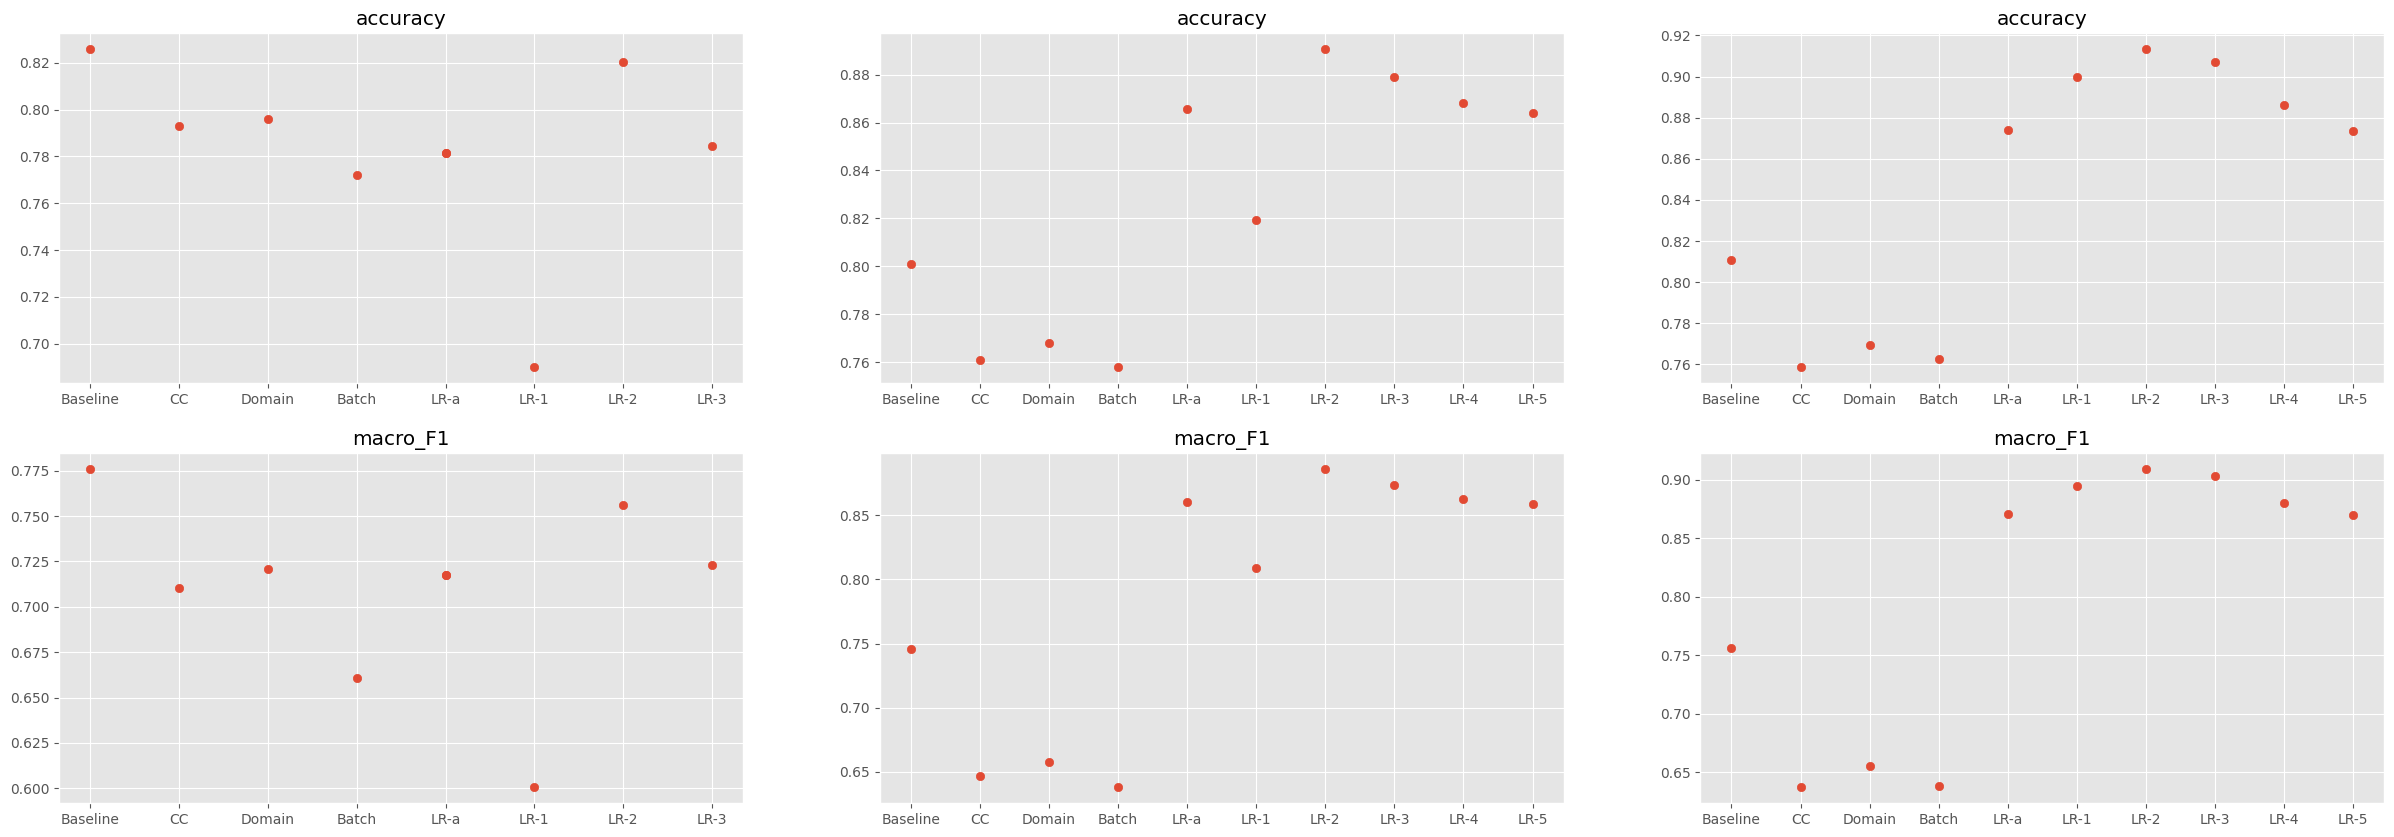

In [105]:
generate_plot([results_dicts[4],results_dicts[8],results_dicts[16]], 'agnews', [methods_to_compare_4, methods_to_compare_8,methods_to_compare_8], ['accuracy','macro_F1'])

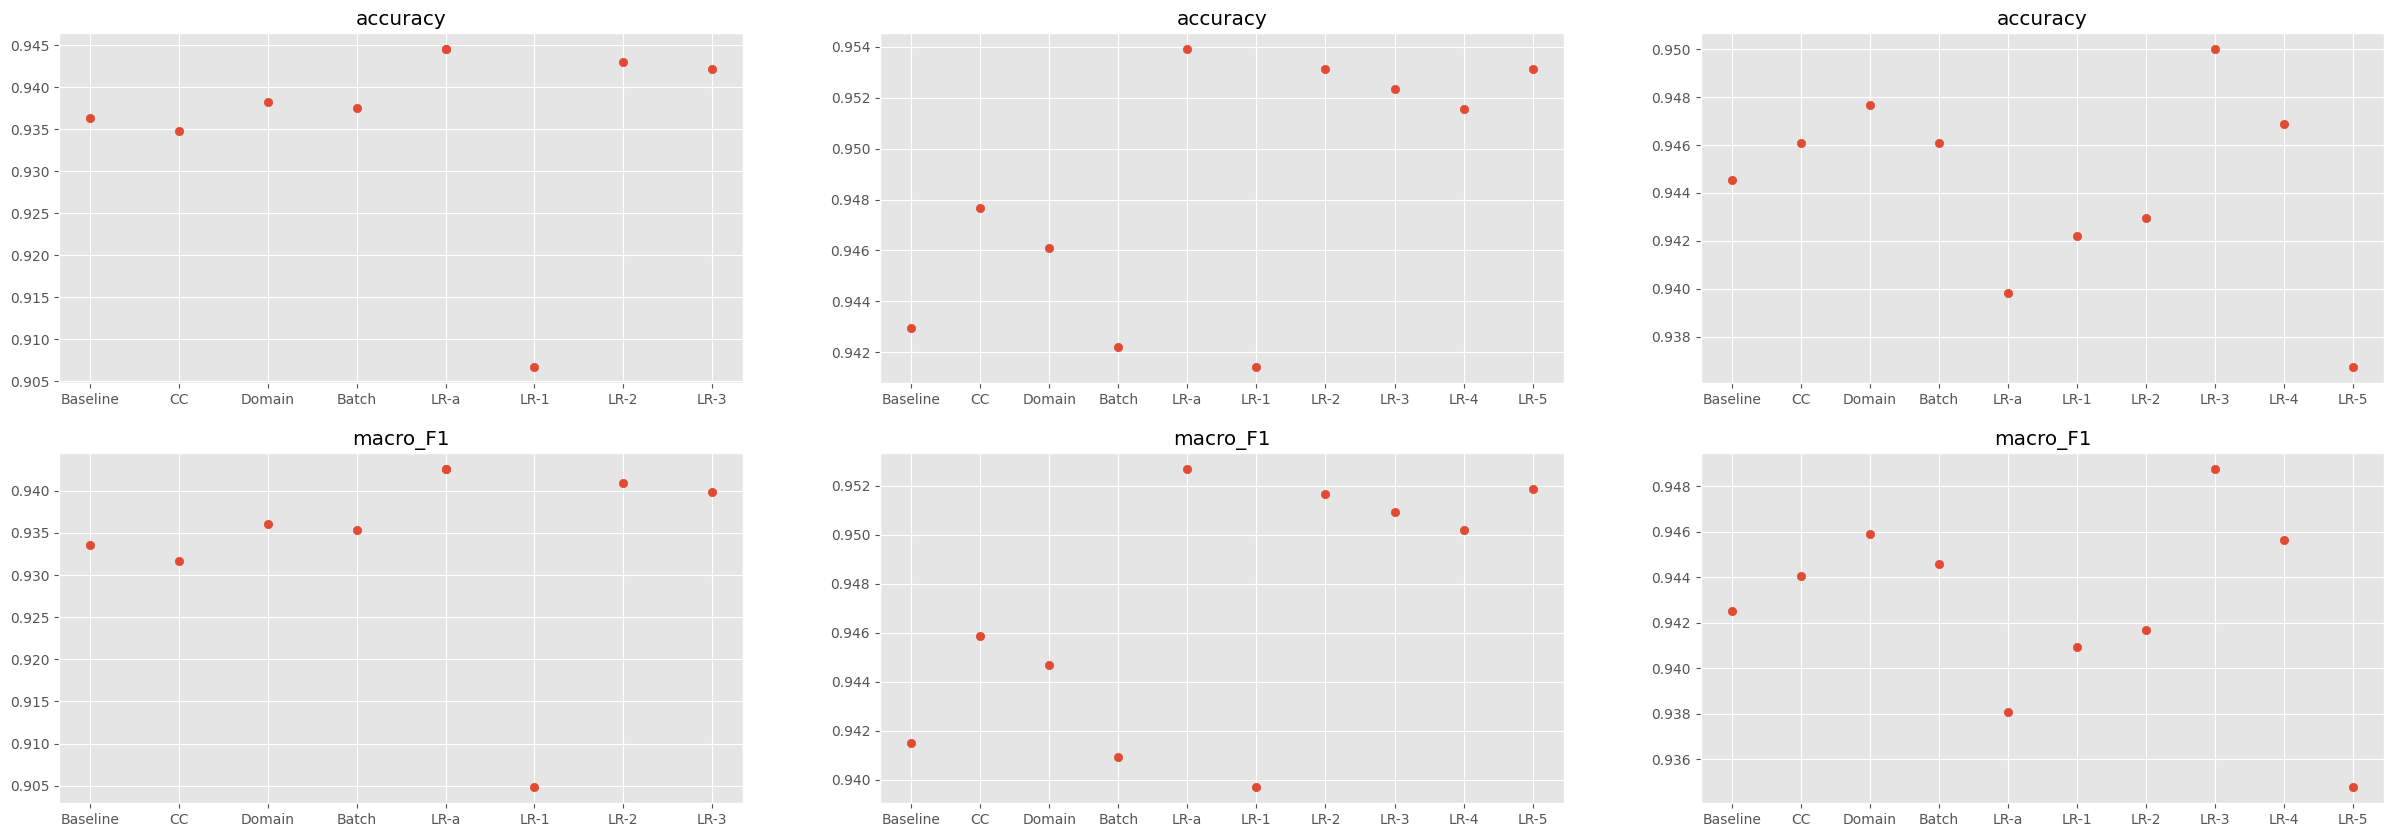

In [106]:
generate_plot([results_dicts[4],results_dicts[8],results_dicts[16]], 'glue_sst2', [methods_to_compare_4, methods_to_compare_8,methods_to_compare_8], ['accuracy','macro_F1'])

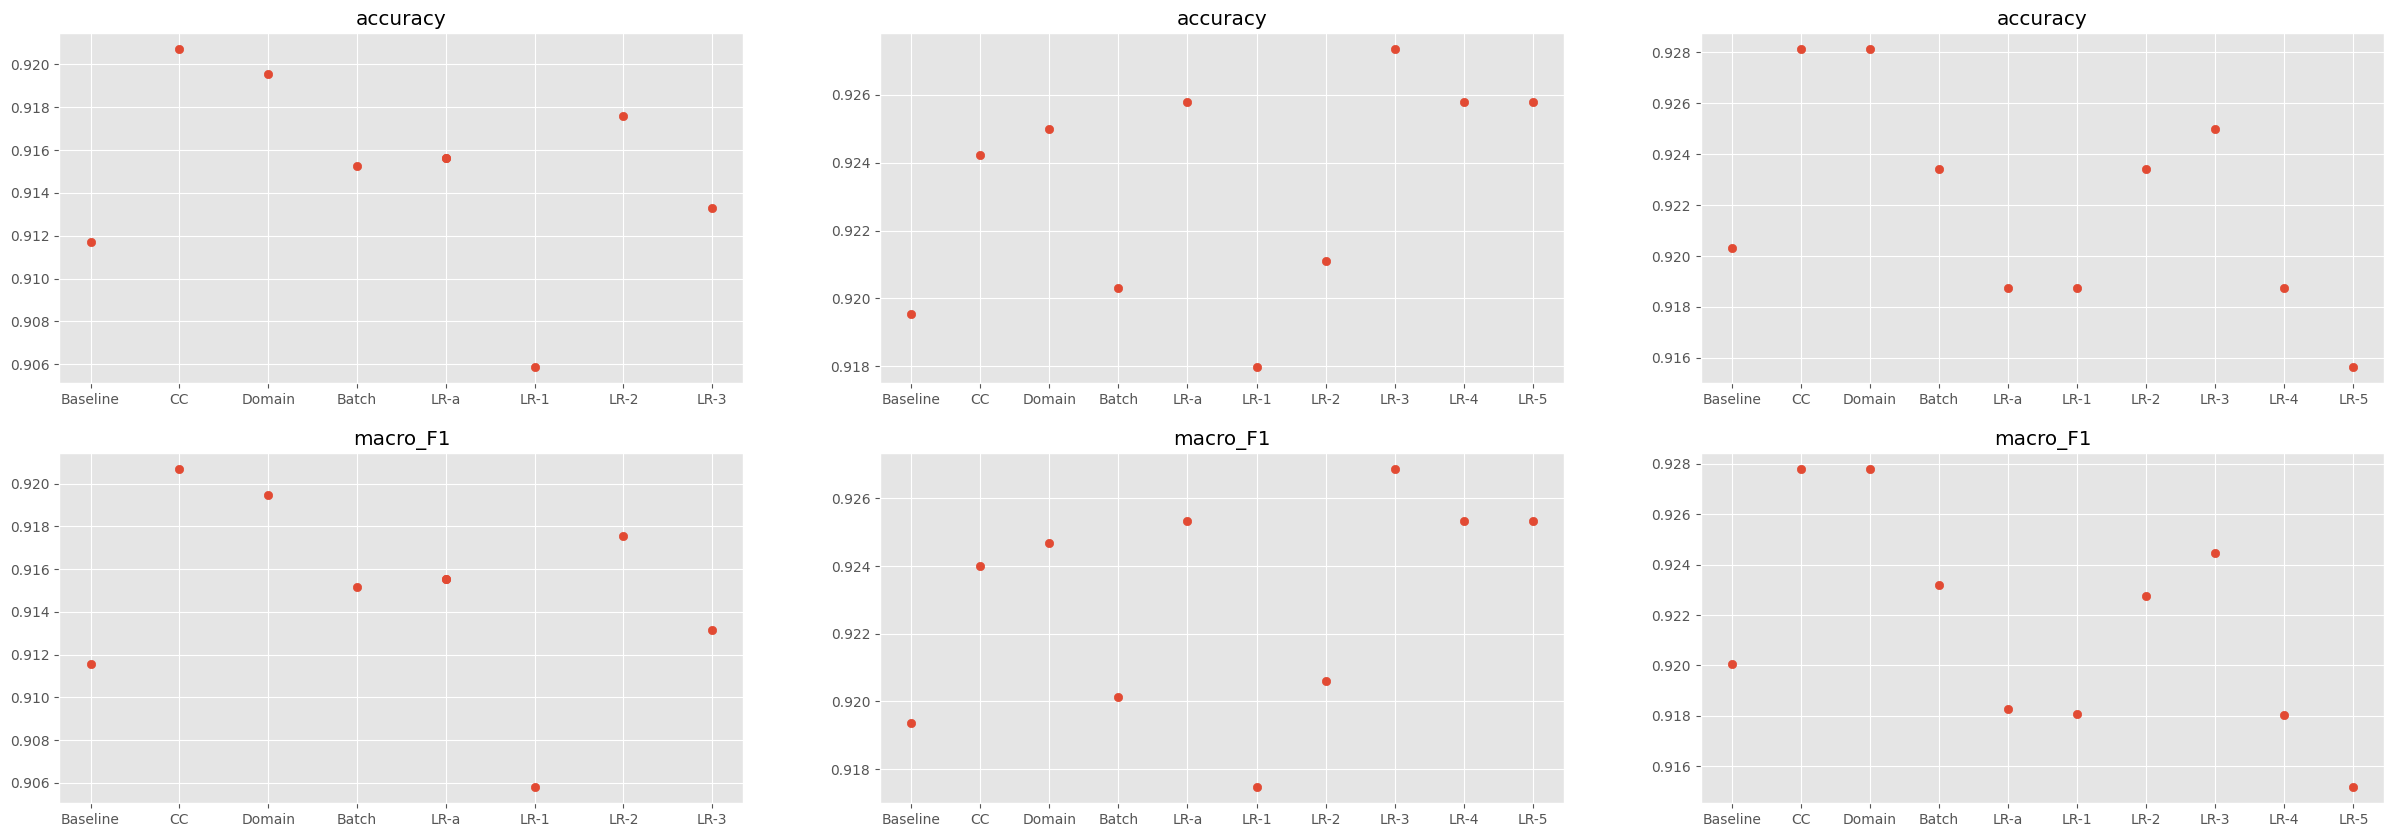

In [107]:
generate_plot([results_dicts[4],results_dicts[8],results_dicts[16]], 'rotten_tomatoes', [methods_to_compare_4, methods_to_compare_8,methods_to_compare_8], ['accuracy','macro_F1'])

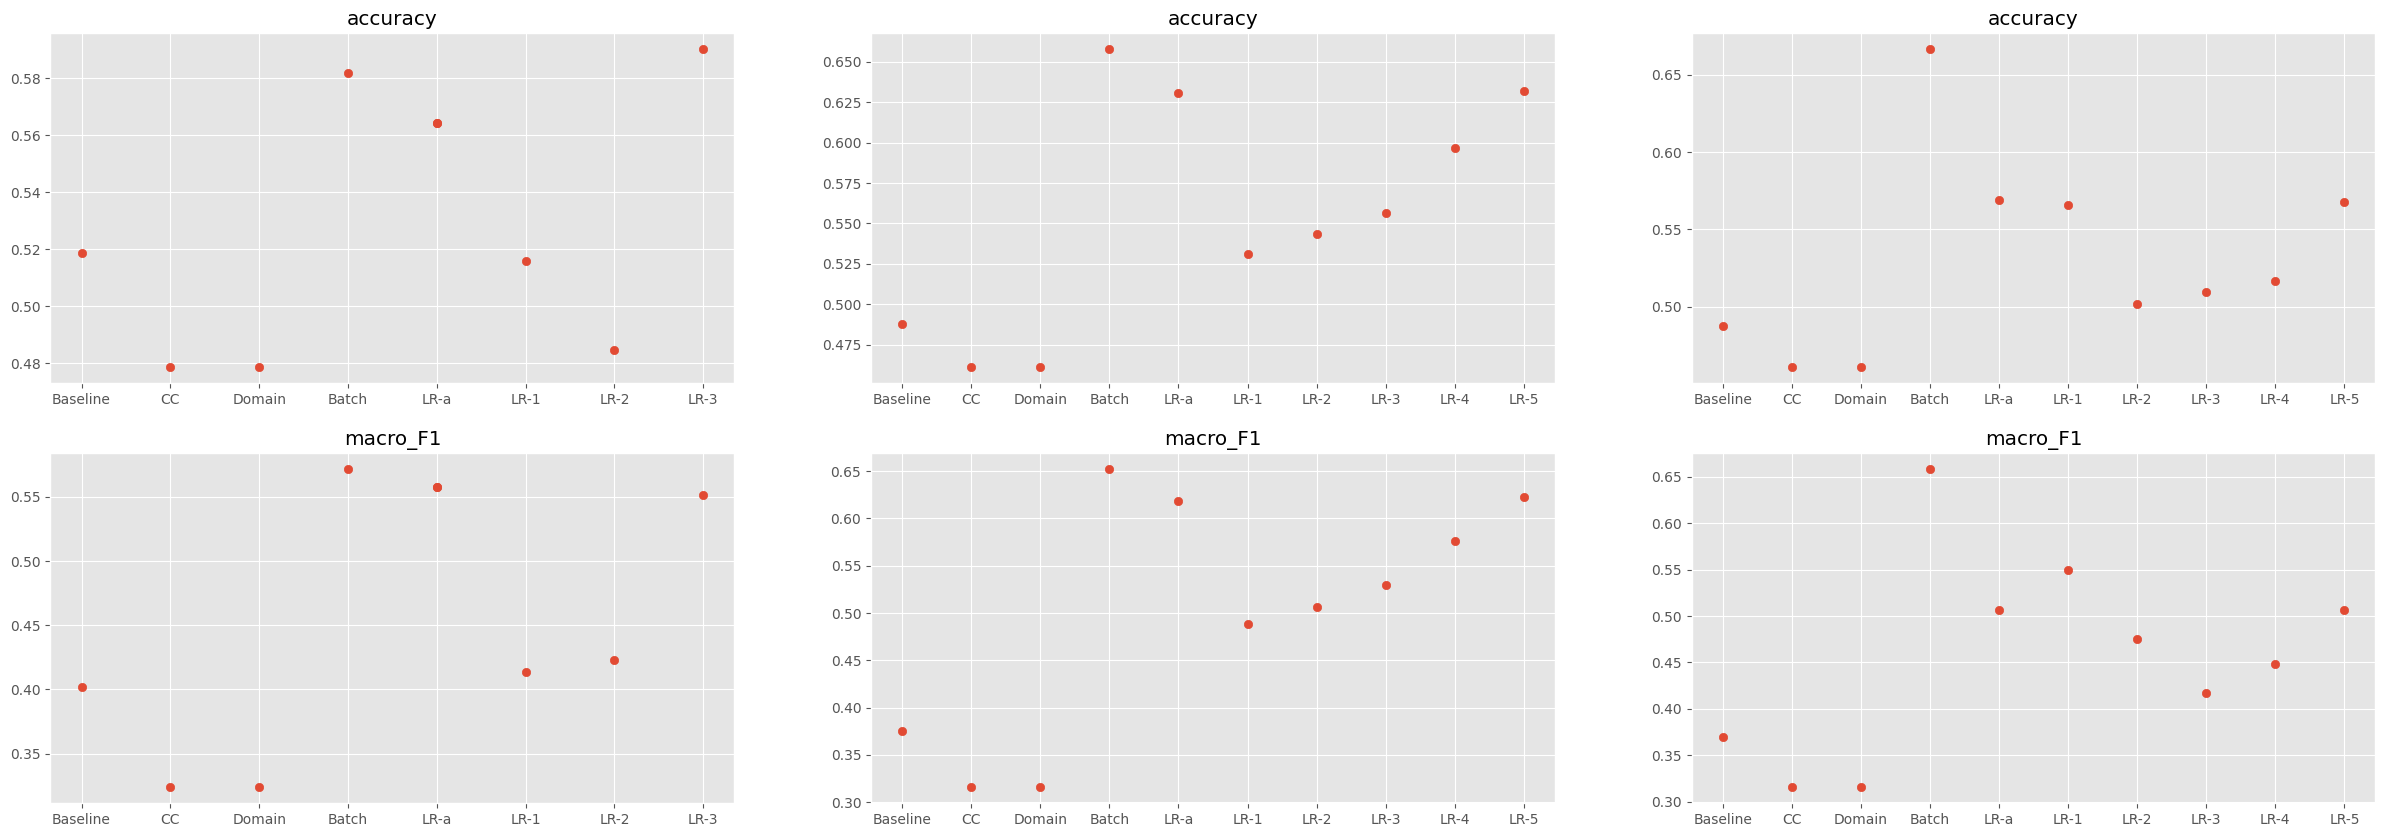

In [108]:
generate_plot([results_dicts[4],results_dicts[8],results_dicts[16]], 'subjective', [methods_to_compare_4, methods_to_compare_8,methods_to_compare_8], ['accuracy','macro_F1'])

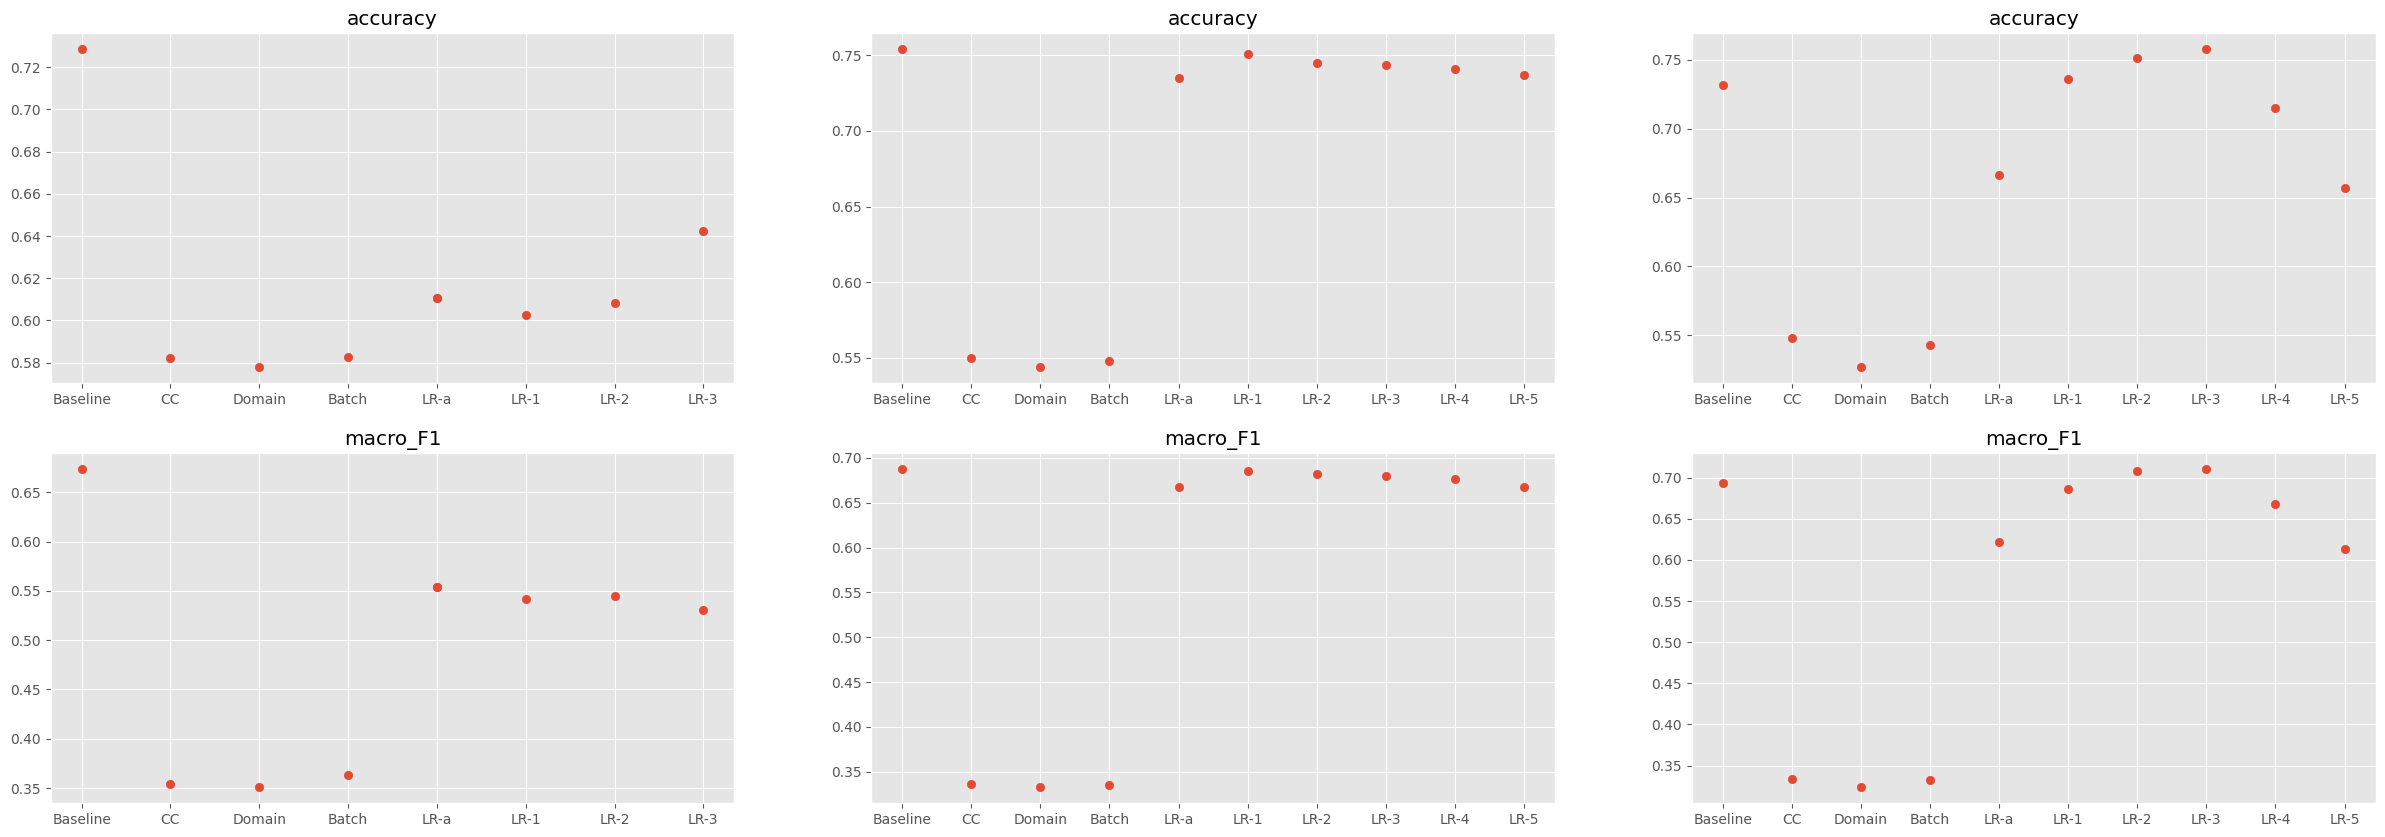

In [109]:
generate_plot([results_dicts[4],results_dicts[8],results_dicts[16]], 'tweet_eval_emotion', [methods_to_compare_4, methods_to_compare_8,methods_to_compare_8], ['accuracy','macro_F1'])

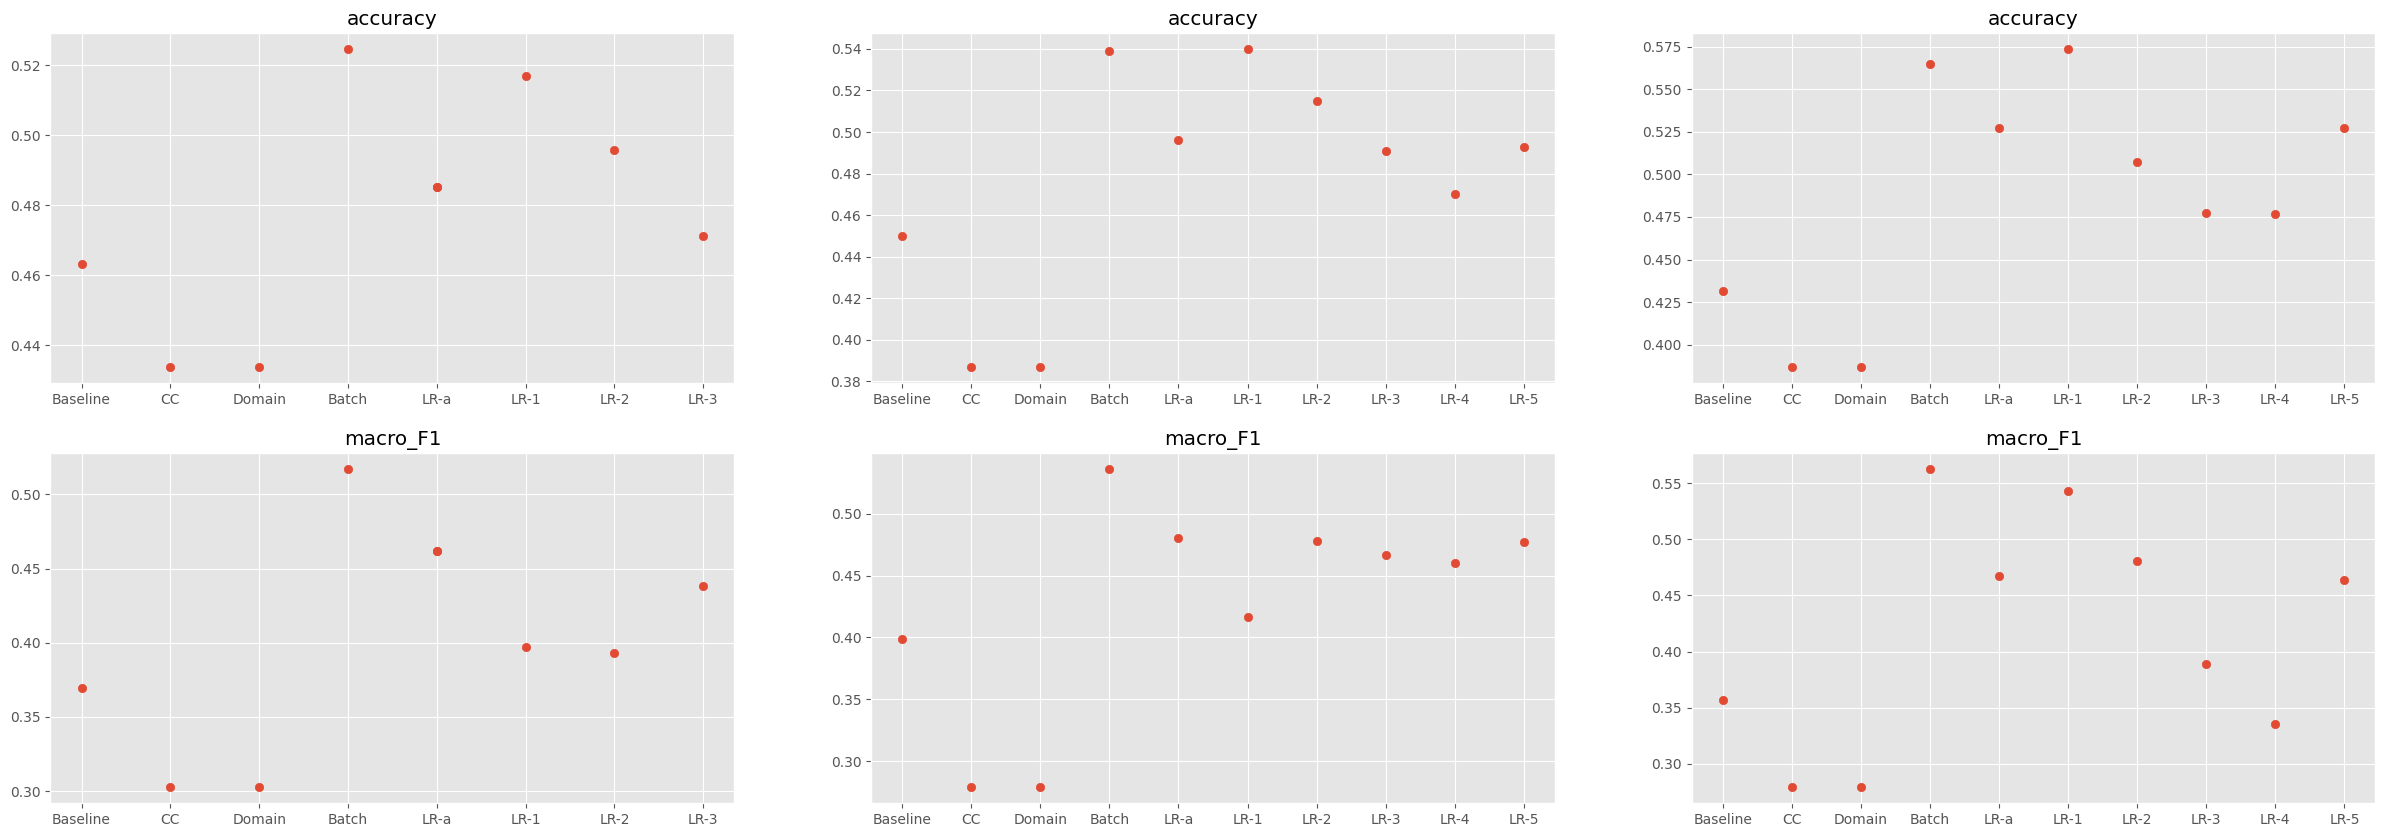

In [110]:
generate_plot([results_dicts[4],results_dicts[8],results_dicts[16]], 'tweet_eval_hate', [methods_to_compare_4, methods_to_compare_8,methods_to_compare_8], ['accuracy','macro_F1'])

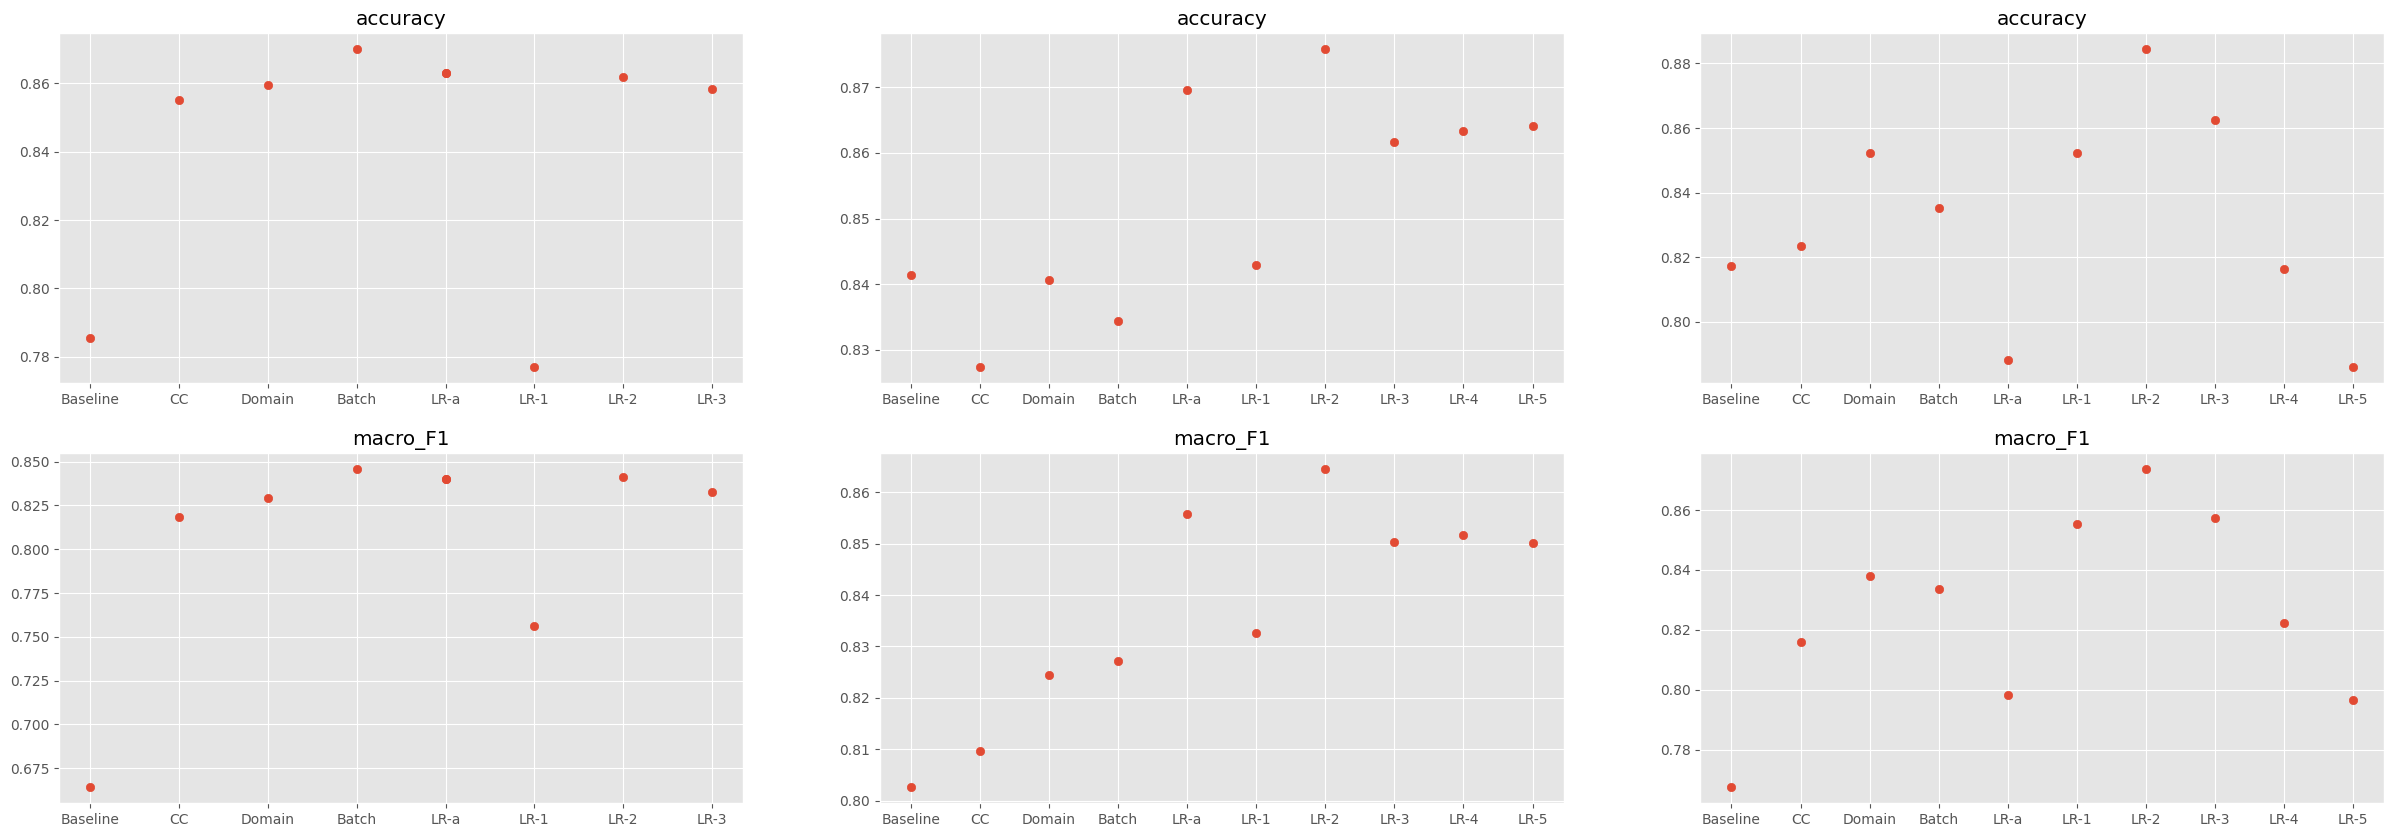

In [111]:
generate_plot([results_dicts[4],results_dicts[8],results_dicts[16]], 'financial_phrasebank', [methods_to_compare_4, methods_to_compare_8,methods_to_compare_8], ['accuracy','macro_F1'])

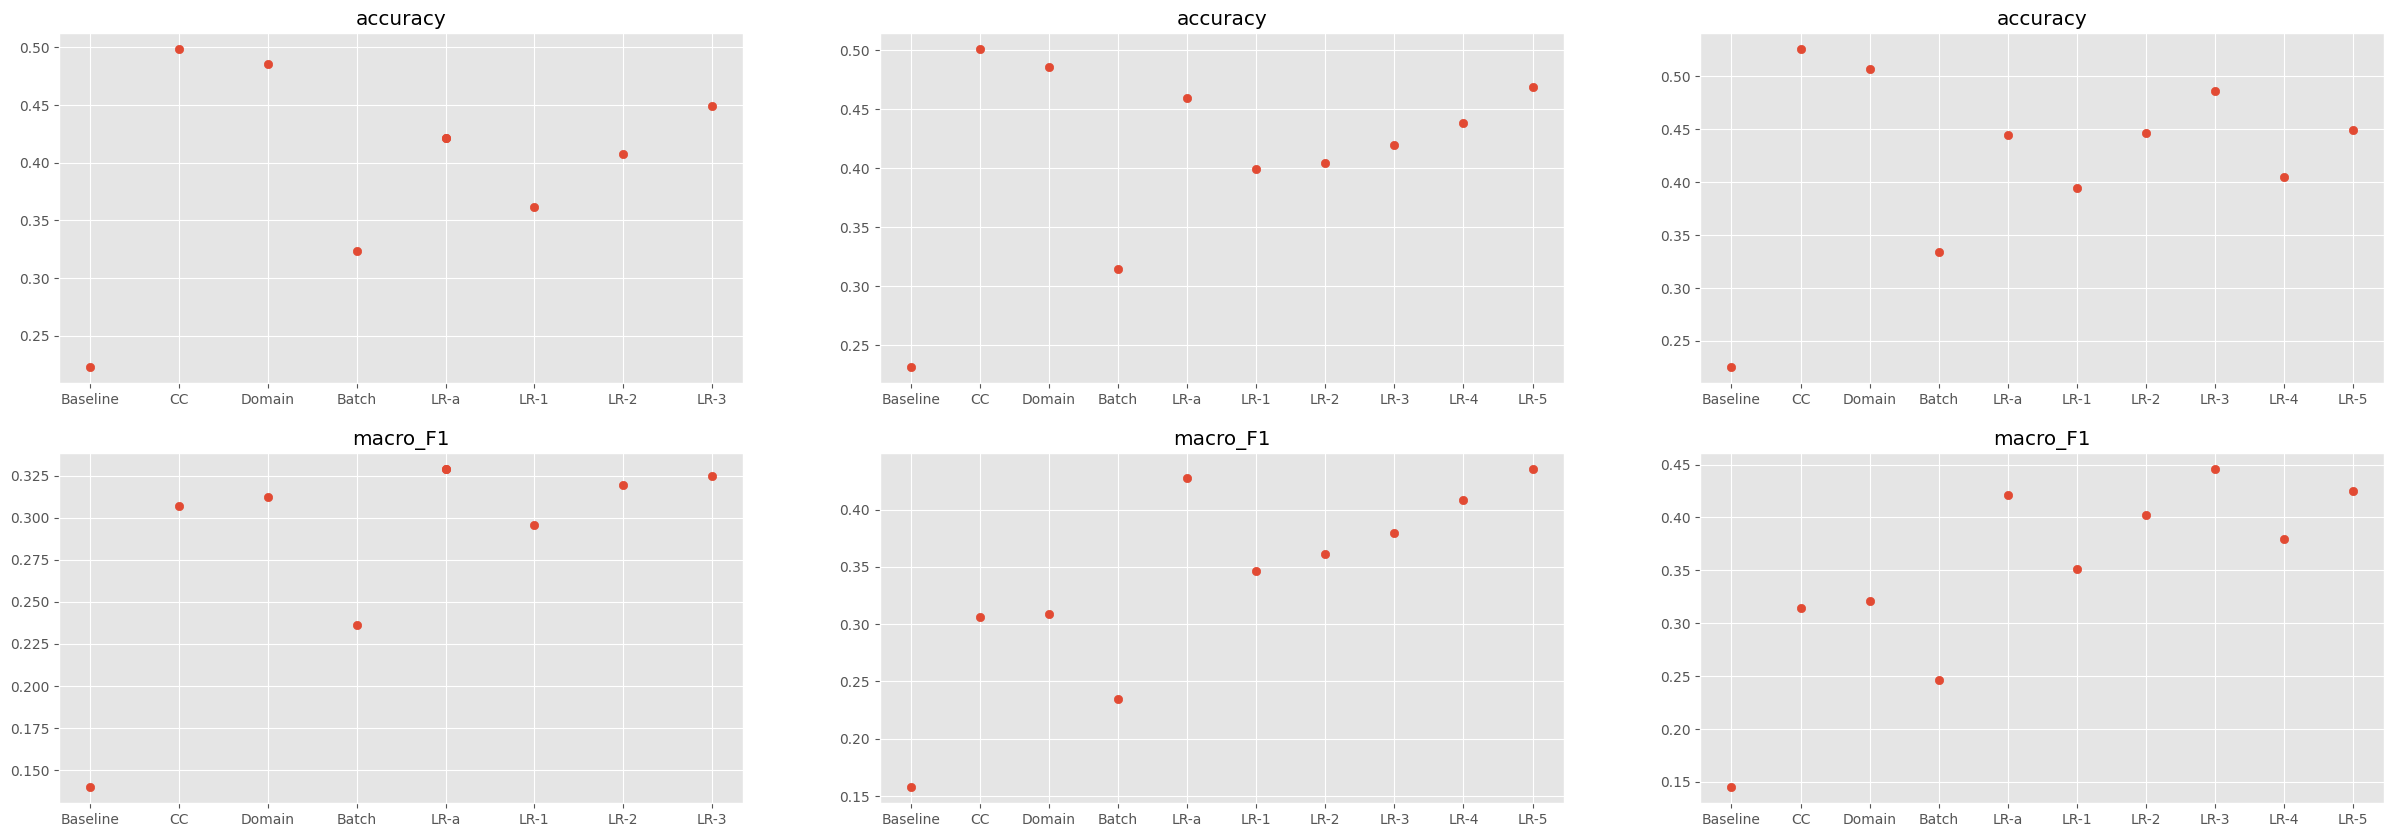

In [112]:
generate_plot([results_dicts[4],results_dicts[8],results_dicts[16]], 'sst5', [methods_to_compare_4, methods_to_compare_8,methods_to_compare_8], ['accuracy','macro_F1'])

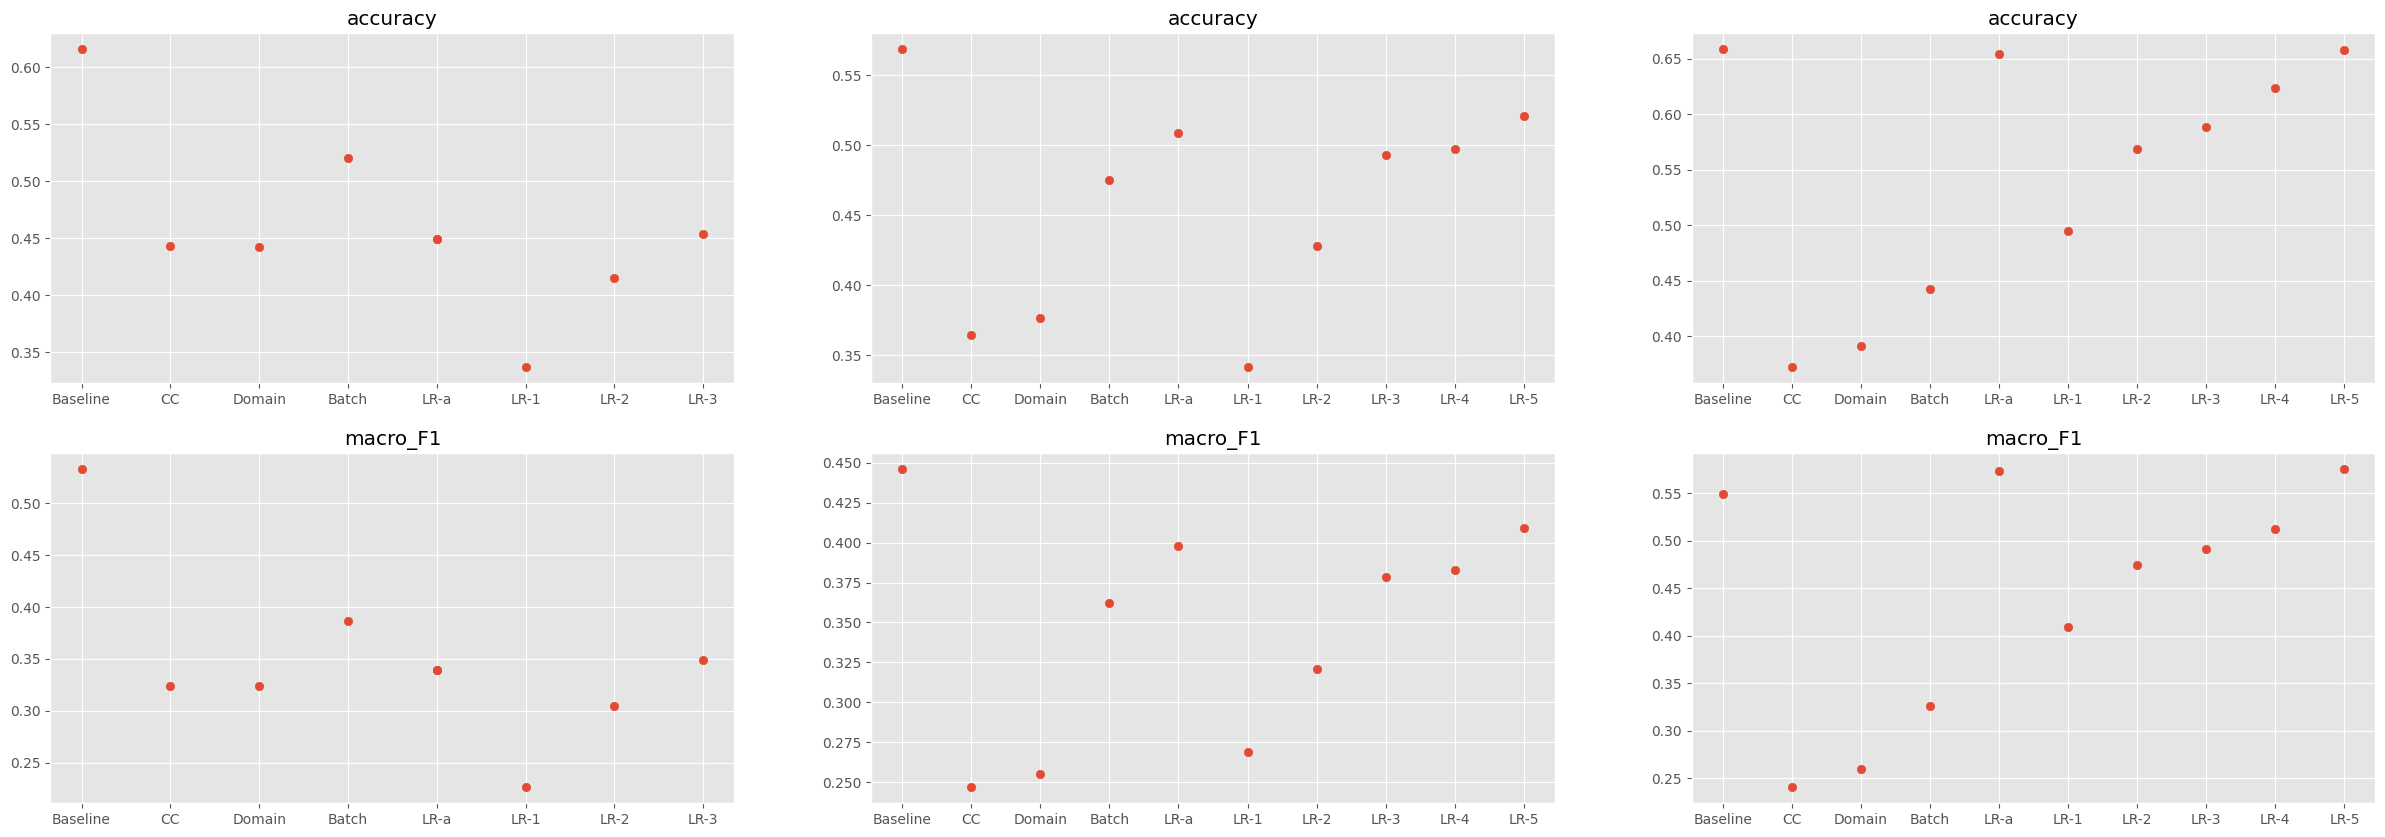

In [113]:
generate_plot([results_dicts[4],results_dicts[8],results_dicts[16]], 'trec', [methods_to_compare_4, methods_to_compare_8,methods_to_compare_8], ['accuracy','macro_F1'])